<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#package" data-toc-modified-id="package-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>package</a></span></li><li><span><a href="#function" data-toc-modified-id="function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>function</a></span></li><li><span><a href="#main" data-toc-modified-id="main-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>main</a></span><ul class="toc-item"><li><span><a href="#get-clean-raw-data" data-toc-modified-id="get-clean-raw-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>get clean raw data</a></span></li><li><span><a href="#clean-up-for-classification" data-toc-modified-id="clean-up-for-classification-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>clean up for classification</a></span></li></ul></li><li><span><a href="#test" data-toc-modified-id="test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>test</a></span></li><li><span><a href="#end" data-toc-modified-id="end-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>end</a></span></li></ul></div>

In [1]:
## Pre-setting
# if one module is changed, this line will automatically reload that module
%load_ext autoreload
%autoreload 2
# display the figure in the notebook
%matplotlib inline
# To change the font size in acrobat
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

%load_ext memory_profiler

## package

In [2]:
import os
import sys
curr_folder = os.path.dirname(__file__) if '__file__' in dir() else os.path.abspath('')
src_dir = os.path.abspath(os.path.join(curr_folder, os.pardir, 'src'))
if src_dir not in sys.path: sys.path.insert(0, src_dir)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
## System package
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd
pd.options.display.max_columns = 500
# pd.options.display.max_rows = 500

## function

## main

### get clean raw data

In [5]:
clean_data_dir = os.path.abspath(os.path.join(os.pardir, 'data', 's2021_lumen_clean_data'))
cd_sia_liwc_class_file = 's2021_06_20_01_lumen_clean_doc_sia_liwc_classify.csv'
cd_sia_liwc_class_path = os.path.join(clean_data_dir, cd_sia_liwc_class_file)

In [6]:
cd_df = pd.read_csv(cd_sia_liwc_class_path)

cd_df

,raw_text_id,raw_text,text_type,nostop_stem_doc,nostop_stem_doc_len,clean_doc,clean_doc_len,pos_sia,compound_sia,neu_sia,neg_sia,posemo_liwc,negemo_liwc,anx_liwc,anger_liwc,sad_liwc,reward_liwc,risk_liwc,time_liwc,money_liwc,Authority or Expertise/Source Credibility,Blame/guilt,Commitment,Commitment- Call to Action,Commitment- Indignation,Emphasis,Gain framing,Liking,Loss framing,Objectivity,Reciprocation,Scarcity/Urgency/Opportunity,Social Proof,Social Proof- Admonition,Subjectivity
0,0,"""A Baker Swept By,"" by Edward Hirsch Audio: Re...",news left,baker swept edward hirsch audio read author al...,69,a baker swept by by edward hirsch audio read b...,137,0.075,0.7506,0.905,0.020,4,1,0,0,1,0,1,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,"""Get Out"" Won’t Have A 100% Rating On Rotten T...",news left,get rate rotten tomato ever fact jordan peel g...,99,get out won t have a rating on rotten tomatoes...,194,0.115,-0.5607,0.772,0.113,6,6,0,0,0,7,1,10,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1
2,3,"""Know Your Rights or Your Safety Is At Risk In...",russian ad,know right safeti risk interact polic shock vi...,76,know your rights or your safety is at risk in ...,146,0.068,-0.8751,0.790,0.142,4,2,1,0,0,2,4,3,1,0,1,1,1,1,1,0,0,0,1,0,0,1,1,1
3,4,"""Nancy Pelosi was drunk again today,"" begins a...",fake news,nanci pelosi drunk today begin post recent sha...,90,nancy pelosi was drunk again today begins a po...,172,0.078,-0.1027,0.831,0.092,6,1,0,0,0,5,0,11,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,5,"""Obama out"": POTUS ends speech with viral mic ...",news left,obama potu end speech viral mic drop presid ba...,58,obama out potus ends speech with viral mic dro...,105,0.047,0.1779,0.913,0.040,2,1,0,0,0,1,0,6,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,2993,’The View’ Co-host Joy Behar: Trump Is ’The Mo...,news right,view host joy behar trump danger man aliv mond...,70,the view co host joy behar trump is the most d...,126,0.178,0.6760,0.696,0.127,4,6,0,1,0,1,4,3,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1
2767,2994,’Will Hillary Clinton Get Prosecuted’: Most-Go...,news right,hillari clinton get prosecut googl hillari sea...,76,will hillary clinton get prosecuted most googl...,128,0.086,0.2062,0.834,0.080,3,0,0,0,0,8,0,13,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2768,2995,’You Are Amazing!’ Donald Trump Wrote To Harry...,news left,amaz donald trump wrote harri reid letter sen ...,58,you are amazing donald trump wrote to harry re...,102,0.197,0.9666,0.803,0.000,7,0,0,0,0,4,0,8,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2769,2996,“Purple Rain” Is Returning To Theaters In Trib...,news left,purpl rain return theater tribut princ purpl r...,105,purple rain is returning to theaters in tribut...,182,0.155,0.9738,0.825,0.020,12,1,0,0,1,5,0,15,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0


### clean up for classification

In [7]:
cd_df.columns

Index(['raw_text_id', 'raw_text', 'text_type', 'nostop_stem_doc',
       'nostop_stem_doc_len', 'clean_doc', 'clean_doc_len', 'pos_sia',
       'compound_sia', 'neu_sia', 'neg_sia', 'posemo_liwc', 'negemo_liwc',
       'anx_liwc', 'anger_liwc', 'sad_liwc', 'reward_liwc', 'risk_liwc',
       'time_liwc', 'money_liwc', 'Authority or Expertise/Source Credibility',
       'Blame/guilt', 'Commitment', 'Commitment- Call to Action',
       'Commitment- Indignation', 'Emphasis', 'Gain framing', 'Liking',
       'Loss framing', 'Objectivity', 'Reciprocation',
       'Scarcity/Urgency/Opportunity', 'Social Proof',
       'Social Proof- Admonition', 'Subjectivity'],
      dtype='object')

In [8]:
label_clms = [
    'Authority or Expertise/Source Credibility',
    'Blame/guilt',
    'Commitment',
    'Commitment- Call to Action',
    'Commitment- Indignation',
    'Emphasis',
    'Gain framing',
    'Liking',
    'Loss framing',
    'Objectivity',
    'Reciprocation',
    'Scarcity/Urgency/Opportunity',
    'Social Proof',
    'Social Proof- Admonition',
    'Subjectivity',
]

len(label_clms)

15

In [9]:
df1 = cd_df[label_clms].sum().to_frame(name='label_ct').rename_axis('label').reset_index().sort_values('label_ct', ascending=1)
df1['label_pct'] = df1.label_ct/len(cd_df)
df1

,label,label_ct,label_pct
10,Reciprocation,128,0.046193
8,Loss framing,211,0.076146
4,Commitment- Indignation,240,0.086611
12,Social Proof,323,0.116564
6,Gain framing,390,0.140743
13,Social Proof- Admonition,402,0.145074
7,Liking,565,0.203898
11,Scarcity/Urgency/Opportunity,779,0.281126
1,Blame/guilt,856,0.308914
5,Emphasis,933,0.336702


Text(0.5, 0, 'percent of docs')

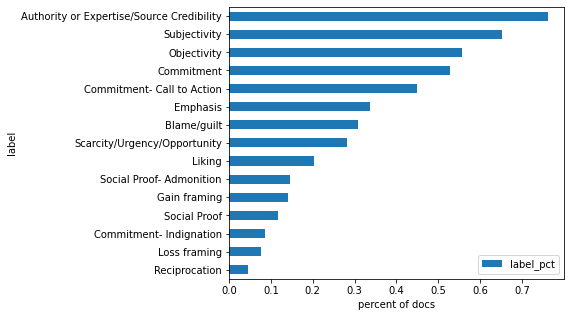

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
df1.plot.barh(x='label', y='label_pct', rot=0, ax=ax)
ax.set_xlabel('percent of docs')




In [11]:
df2 = cd_df[ ['text_type']+label_clms].copy()
df2

,text_type,Authority or Expertise/Source Credibility,Blame/guilt,Commitment,Commitment- Call to Action,Commitment- Indignation,Emphasis,Gain framing,Liking,Loss framing,Objectivity,Reciprocation,Scarcity/Urgency/Opportunity,Social Proof,Social Proof- Admonition,Subjectivity
0,news left,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,news left,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1
2,russian ad,0,1,1,1,1,1,0,0,0,1,0,0,1,1,1
3,fake news,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,news left,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,news right,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1
2767,news right,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2768,news left,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2769,news left,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0


<AxesSubplot:xlabel='text_type'>

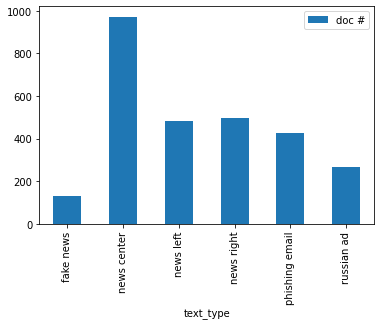

In [12]:
df2.groupby(['text_type']).size().to_frame('doc #').plot.bar()

In [13]:
df3 = (df2.groupby(['text_type']).sum() / df2.groupby(['text_type']).count()).reset_index()
df3

,text_type,Authority or Expertise/Source Credibility,Blame/guilt,Commitment,Commitment- Call to Action,Commitment- Indignation,Emphasis,Gain framing,Liking,Loss framing,Objectivity,Reciprocation,Scarcity/Urgency/Opportunity,Social Proof,Social Proof- Admonition,Subjectivity
0,fake news,0.922481,0.457364,0.565891,0.333333,0.131783,0.240310,0.015504,0.054264,0.015504,0.728682,0.000000,0.031008,0.170543,0.356589,0.674419
1,news center,0.877572,0.230453,0.432099,0.259259,0.025720,0.257202,0.099794,0.135802,0.043210,0.676955,0.029835,0.200617,0.068930,0.093621,0.584362
2,news left,0.790021,0.386694,0.486486,0.322245,0.085239,0.251559,0.085239,0.313929,0.033264,0.565489,0.085239,0.274428,0.130977,0.153846,0.683992
3,news right,0.896970,0.458586,0.610101,0.620202,0.195960,0.171717,0.032323,0.133333,0.020202,0.593939,0.006061,0.133333,0.076768,0.240404,0.650505
4,phishing email,0.478972,0.158879,0.588785,0.850467,0.004673,0.570093,0.441589,0.292056,0.303738,0.292056,0.079439,0.696262,0.114486,0.053738,0.672897
5,russian ad,0.409774,0.345865,0.676692,0.458647,0.218045,0.759398,0.169173,0.315789,0.041353,0.379699,0.078947,0.315789,0.315789,0.184211,0.800752


In [14]:
len(df3.columns)

16

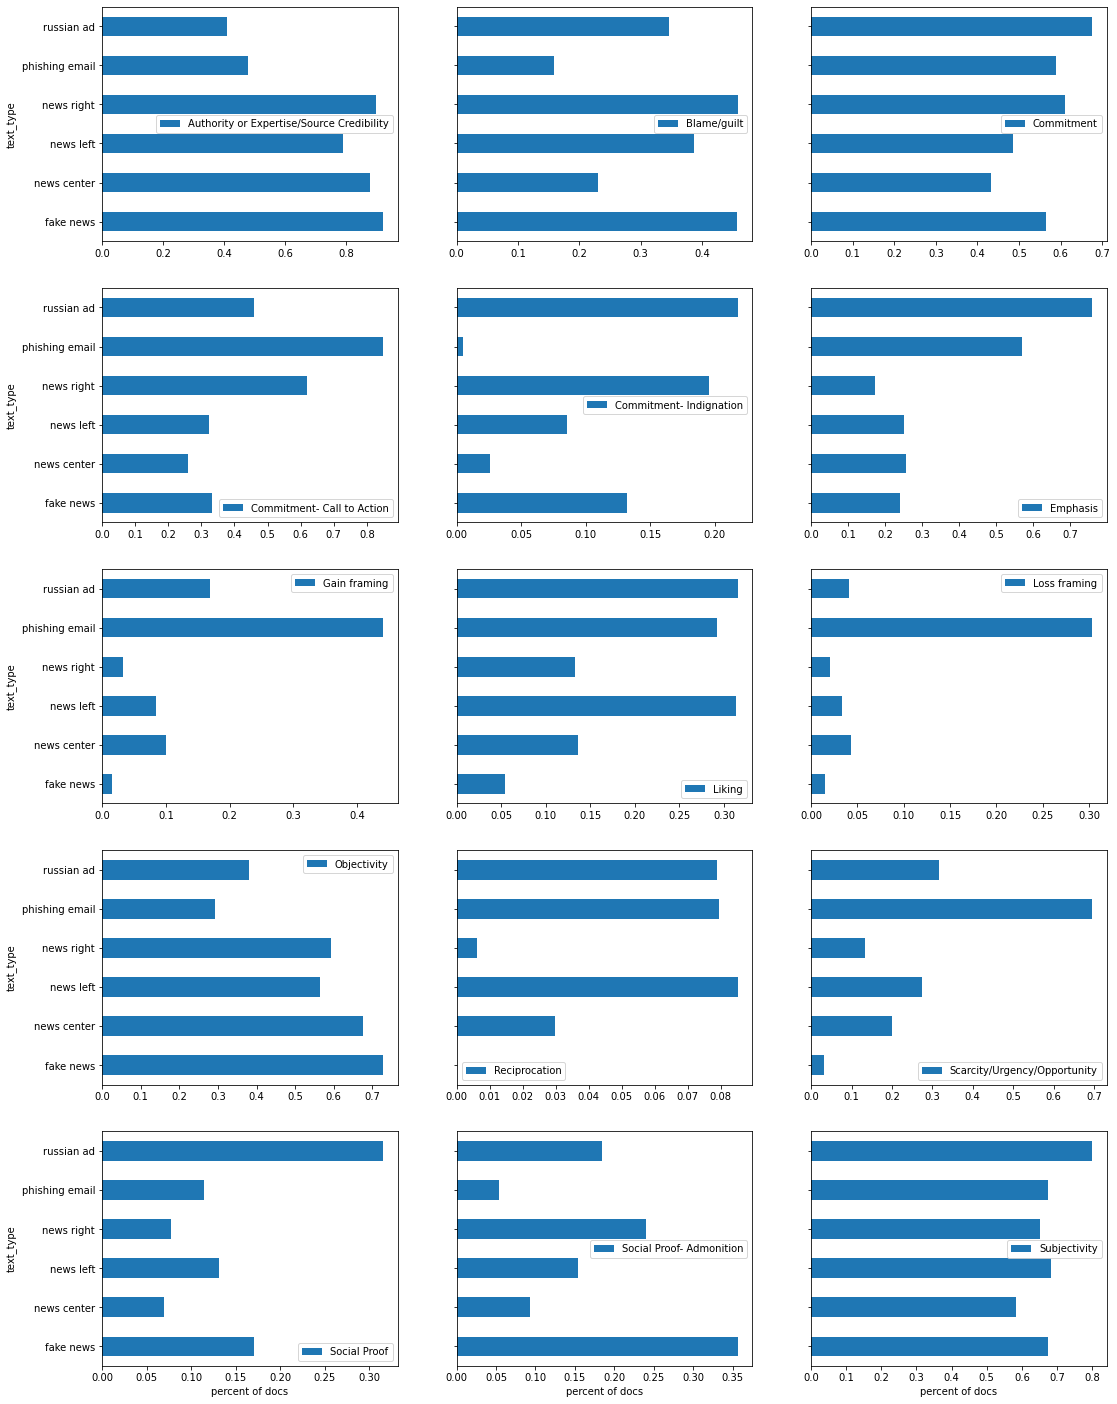

In [15]:
nrows=5
ncols=3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols* 6, nrows * 5))

for r in range(nrows):
    for c in range(ncols):
        
        idx = ncols * r + c
        
        ax=axes[r][c]
        

        
        column = df3.columns[idx+1]
        df3.plot.barh(x='text_type', y=column, rot=0, ax=ax)
 
        if r == nrows-1:
            ax.set_xlabel('percent of docs')
        
        if c != 0:
            ax.set_ylabel('')
            ax.set_yticklabels('')
            




## test

In [16]:
1

1

## end

In [17]:
1

1